<a href="https://colab.research.google.com/github/donlasSR/WasteClassification/blob/main/svm_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import os
from skimage.io import imread
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report


In [ ]:
# !unzip "/content/drive/MyDrive/data/process_dataset.zip" -d "/content/drive/MyDrive/data"

In [ ]:
dp = '/content/drive/MyDrive/data'

# แสดงรายการไฟล์ในโฟลเดอร์
files = os.listdir(dp)
print(f"ไฟล์ในโฟลเดอร์: {files}")


ไฟล์ในโฟลเดอร์: ['process_dataset.zip', 'glass', 'metal', 'paper', 'plastic', 'waste']


In [ ]:
# กำหนดพาธของข้อมูล
data_path = '/content/drive/MyDrive/data'
categories = ['glass', 'metal', 'paper', 'plastic', 'waste']  # หมวดหมู่ที่เรามี

# เตรียมข้อมูล
images = []
labels = []

for category_index, category in enumerate(categories):
    category_path = os.path.join(data_path, category)
    for filename in os.listdir(category_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # ถ้าเป็นไฟล์ภาพ
            image_path = os.path.join(category_path, filename)
            image = imread(image_path)  # โหลดภาพ
            image = image.flatten()  # แปลงเป็นเวกเตอร์ 1 มิติ
            images.append(image)
            labels.append(category_index)  # กำหนด label สำหรับหมวดหมู่

# แปลงเป็น numpy arrays
X = np.array(images)
y = np.array(labels)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# สร้างโมเดล SVM
svm = SVC(kernel='rbf', C=1, gamma=0.1)  # ใช้ RBF Kernel
svm.fit(X_train, y_train)

# ทำนายผล
y_pred = svm.predict(X_test)

# # ประเมินผล
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# ประเมินผล
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.21481481481481482
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.15       149
           1       1.00      0.02      0.03       127
           2       0.19      1.00      0.32       126
           3       1.00      0.02      0.03       131
           4       1.00      0.02      0.04       142

    accuracy                           0.21       675
   macro avg       0.84      0.23      0.11       675
weighted avg       0.85      0.21      0.11       675



In [ ]:
# สร้างโมเดล SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# ทำนายผล
y_pred = svm.predict(X_test)

# ประเมินผล
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.482962962962963


In [ ]:
# # สร้างโมเดล SVM พร้อมปรับค่าพารามิเตอร์
# svm = SVC(kernel='rbf', C=10, gamma=0.01)
# svm.fit(X_train, y_train)

# # ทำนายผล
# y_pred = svm.predict(X_test)

# # ประเมินผล
# print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[65 16  6 59  3]
 [15 59 15 33  5]
 [14 25 41 27 19]
 [30 24  8 67  2]
 [ 3 10 32  3 94]]


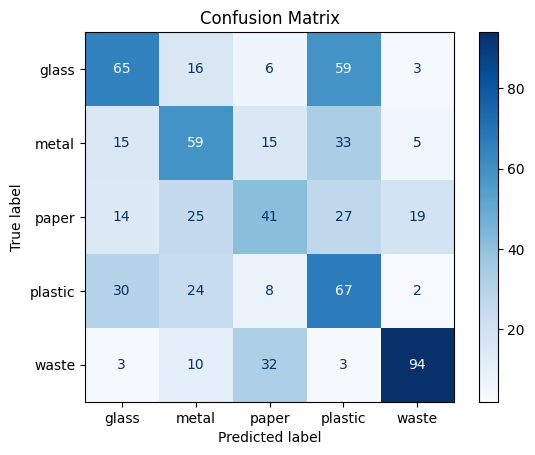

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# แสดง Confusion Matrix ในรูปแบบข้อความ
print("Confusion Matrix:\n", cm)

# แสดง Confusion Matrix ในรูปแบบกราฟ
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['glass', 'metal', 'paper', 'plastic', 'waste'])
disp.plot(cmap=plt.cm.Blues)  # ใช้โทนสีฟ้าเพื่อความชัดเจน
plt.title("Confusion Matrix")
plt.show()